In [1]:
%run ~/Normal_for_DSS.py

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
from keras.models import load_model
from keras.utils import np_utils


In [3]:
%time
x_test = pd.read_csv("X_pub.csv")
X_pubtest = x_test.iloc[:, 1:]
x_pubtest = np.array(X_pubtest)
X_test = x_pubtest.reshape(-1,48,48,1)
Y_test = pd.read_csv("y_pubt.csv")
y_test = np.array(Y_test["0"].values)

#Y_test = np.loadtxt('Y_test.txt', delimiter=',')
#YY_test= pd.DataFrame(Y_test)
#y_test= np.arange(len(Y_test))
#for i in range(len(Y_test)):
#    y_test[i] = np.dot(YY_test.iloc[i], [0,1,2,3,4,5,6])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.01 µs


In [78]:
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""
"""important!!! put your model here"""

#put your model here
model = load_model("method_3_2.hdf5")


In [79]:
# do predict!!

prob_y = model.predict(X_test, batch_size=10)
"""
there`sf two test file X_test is private test set, X_pubtest is public test set.
"""
pre = pd.DataFrame(prob_y)
pred = np.arange(len(pre))
for i in range(len(pred)):
    pred[i] = pre.iloc[i].argmax()
pred_y = pred

In [24]:
#pred_y = model.predict_classes(X_test ,batch_size=10)

In [80]:
# make dataframe and values!!
# Tr => list of true index , Fa => list of False index , Al = all index
fin = pd.DataFrame({"pred_y":pred_y,"test_y":y_test,"ind":range(len(pred_y))})

T = fin.pred_y == fin.test_y
F = fin.pred_y != fin.test_y

fin_g = fin.ind.groupby([fin.pred_y, fin.test_y]).count().unstack()
fin_g = fin_g.fillna(0)

fin_gn = pd.get_dummies(fin_g)

for i in range(7):
    fin_gn.iloc[:,i] = fin_g.iloc[:,i]/fin_g.iloc[:,i].sum()
fin_g.iloc[:,:].sum(axis=1)

fin_gd = pd.DataFrame([0,0,0,0,0,0,0])
for i in range(7):
    fin_gd.iloc[i] = fin_g.iloc[i,i]

fin_gg = pd.get_dummies(fin_g)
for i in range(7):
    fin_gg.iloc[i,i] = 0

prob = pd.DataFrame(prob_y)
prob_order = pd.get_dummies(prob)
for i in range(len(prob)):
    prob_order.iloc[i] = prob.iloc[i].argsort()

T2 = prob_order[5] == fin.test_y
F2 = (prob_order[6] != fin.test_y) & (prob_order[5] != fin.test_y)

T_num = [0,0,0,0,0,0,0]
T_nor = [0,0,0,0,0,0,0]
for i in range(7):
    T_num[i] = len(fin[T][fin.test_y == i])
    T_nor[i] = T_num[i]/float(fin_g[i].sum())
    
T2_num = [0,0,0,0,0,0,0]
T2_nor = [0,0,0,0,0,0,0]
for i in range(7):
    T2_num[i] = len(fin[T2][fin.test_y == i])
    T2_nor[i] = T2_num[i]/float(fin_g[i].sum())

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [81]:
def len_y(T):
    return len(y_test[T])

In [82]:
model_t = [len_y(T), len_y(F), len_y(T2), len_y(F2)]
model_tt = pd.DataFrame(model_t)
model_tt.to_csv("method_3_2.csv")

In [87]:
ac = np.array([(0.9,0.1,0.2),(0.5,0.,0.7),(0.1,0.6, 0.2),(0.8,0.8,0.1),(0.,0.,0.8),(0., 0.7,  0.7),(0.6,0.6,0.6)])
ac1 = ac /2
ac2 = np.array([(0.95, 0.7, 0.75), (0.8, 0.7, 0.9), (0.55, 1., 0.65), (0.92, 0.92, 0.6),(0.6,0.6,1.), (0.6, 0.85, 0.85), (0.8,0.8,0.8)])


def draw_top2():
    plt.figure(figsize=(4,4), facecolor=[0.9, 0.9, 1])

    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_g.iloc[:,:].sum(axis=0).values,color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, T_num ,color=ac)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, T2_num, color = ac, alpha=0.5, bottom=T_num)
    plt.title("Prediction True number for top2",size=15)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    plt.tight_layout()
    plt.show()

def draw_top22():    
    
    plt.figure(figsize=(4,4), facecolor=[0.9, 0.9, 1]) 
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1] ,color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, T_nor ,color=ac)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, T2_nor, color = ac, alpha=0.5, bottom=T_nor)
    plt.title("Prediction True ratio for top2",size=15)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    plt.tight_layout()
    plt.show()
        


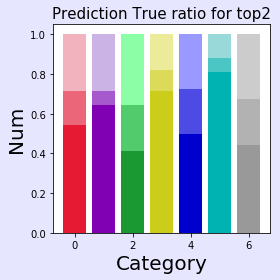

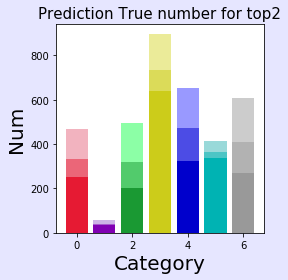

In [88]:
draw_top22()
draw_top2()

In [100]:
def result_show0():
    plt.figure(figsize=(16,36))
    
    plt.subplot(5,2,1)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index,fin_g.iloc[:,:].sum(axis=0).values,color=ac)
    plt.title("Total real number of each category", size = 20)
    plt.ylabel("Num",size=20)
    plt.xlabel("Category", size = 20)
    
    plt.subplot(5,2,2)
    plt.bar(fin_g.iloc[:,:].sum(axis=1).index, fin_g.iloc[:,:].sum(axis=1).values,color=ac)
    plt.title("Total predicted number of each categoryr",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    
    
    
    plt.subplot(5,2,3)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_g.iloc[:,:].sum(axis=0).values,color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac) 
    plt.title("Prediction True number vs tot number",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)
    
    plt.subplot(5,2,4)
    plt.bar(fin_g.iloc[:,:].sum(axis=1).index, fin_g.iloc[:,:].sum(axis=1).values,color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac) 
    plt.title("Prediction True number vs tot number",size=20)
    plt.xlabel("Category", size = 20)
    plt.ylabel("Num", size=20)    
    
    
    plt.subplot(5,2,5)
    
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/(fin_g.iloc[:,:].sum(axis=0).values),color=ac)
    plt.title("Recall ratio of each category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("ratio",size=20)
   
    plt.subplot(5,2,6)
    
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac2)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/(fin_g.iloc[:,:].sum(axis=1).values),color=ac)
    plt.title("Precision ratio of each category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("ratio",size=20)  
    
    plt.subplot(5,2,7)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index,fin_g.iloc[:,:].sum(axis=0).values,color=ac,width=0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac)
    asdd = fin_gd.values.reshape(-1) 
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[i],color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[i].values
    plt.title("Predicted category numbers in each real category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20)    
    
    
    plt.subplot(5,2,8)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index,fin_g.iloc[:,:].sum(axis=1).values,color=ac,width=0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values ,color=ac)
    asdd = fin_gd.values.reshape(-1) 
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[:,i],color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[:,i].values
    plt.title("Each real category numbers in predicted category"  , size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20) 
    
    plt.subplot(5,2,9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac, width = 0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/fin_g.iloc[:,:].sum(axis=0).values ,color=ac)
    asdd = fin_gd.values.reshape(-1) / fin_g.iloc[:,:].sum(axis=0).values
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[i]/fin_g.iloc[:,:].sum(axis=0).values,color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[i].values /fin_g.iloc[:,:].sum(axis=0).values 
    plt.title("Predicted category ratio in each real category", size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20)    
    
        
    plt.subplot(5,2,10)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, [1,1,1,1,1,1,1], color=ac, width = 0.9)
    plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gd.values.reshape(-1)/fin_g.iloc[:,:].sum(axis=1).values ,color=ac)
    asdd = fin_gd.values.reshape(-1) / fin_g.iloc[:,:].sum(axis=1).values
    for i in range(7):
        plt.bar(fin_g.iloc[:,:].sum(axis=0).index, fin_gg.iloc[:,i]/fin_g.iloc[:,:].sum(axis=1).values,color=ac[i],bottom=asdd)
        asdd = asdd + fin_gg.iloc[:,i].values /fin_g.iloc[:,:].sum(axis=1).values 
    
    plt.title("Each real category ratio in predicted category"  , size = 20)
    plt.xlabel("Category",size=20)
    plt.ylabel("Num",size=20) 
    
    plt.tight_layout()
    plt.show() 
        

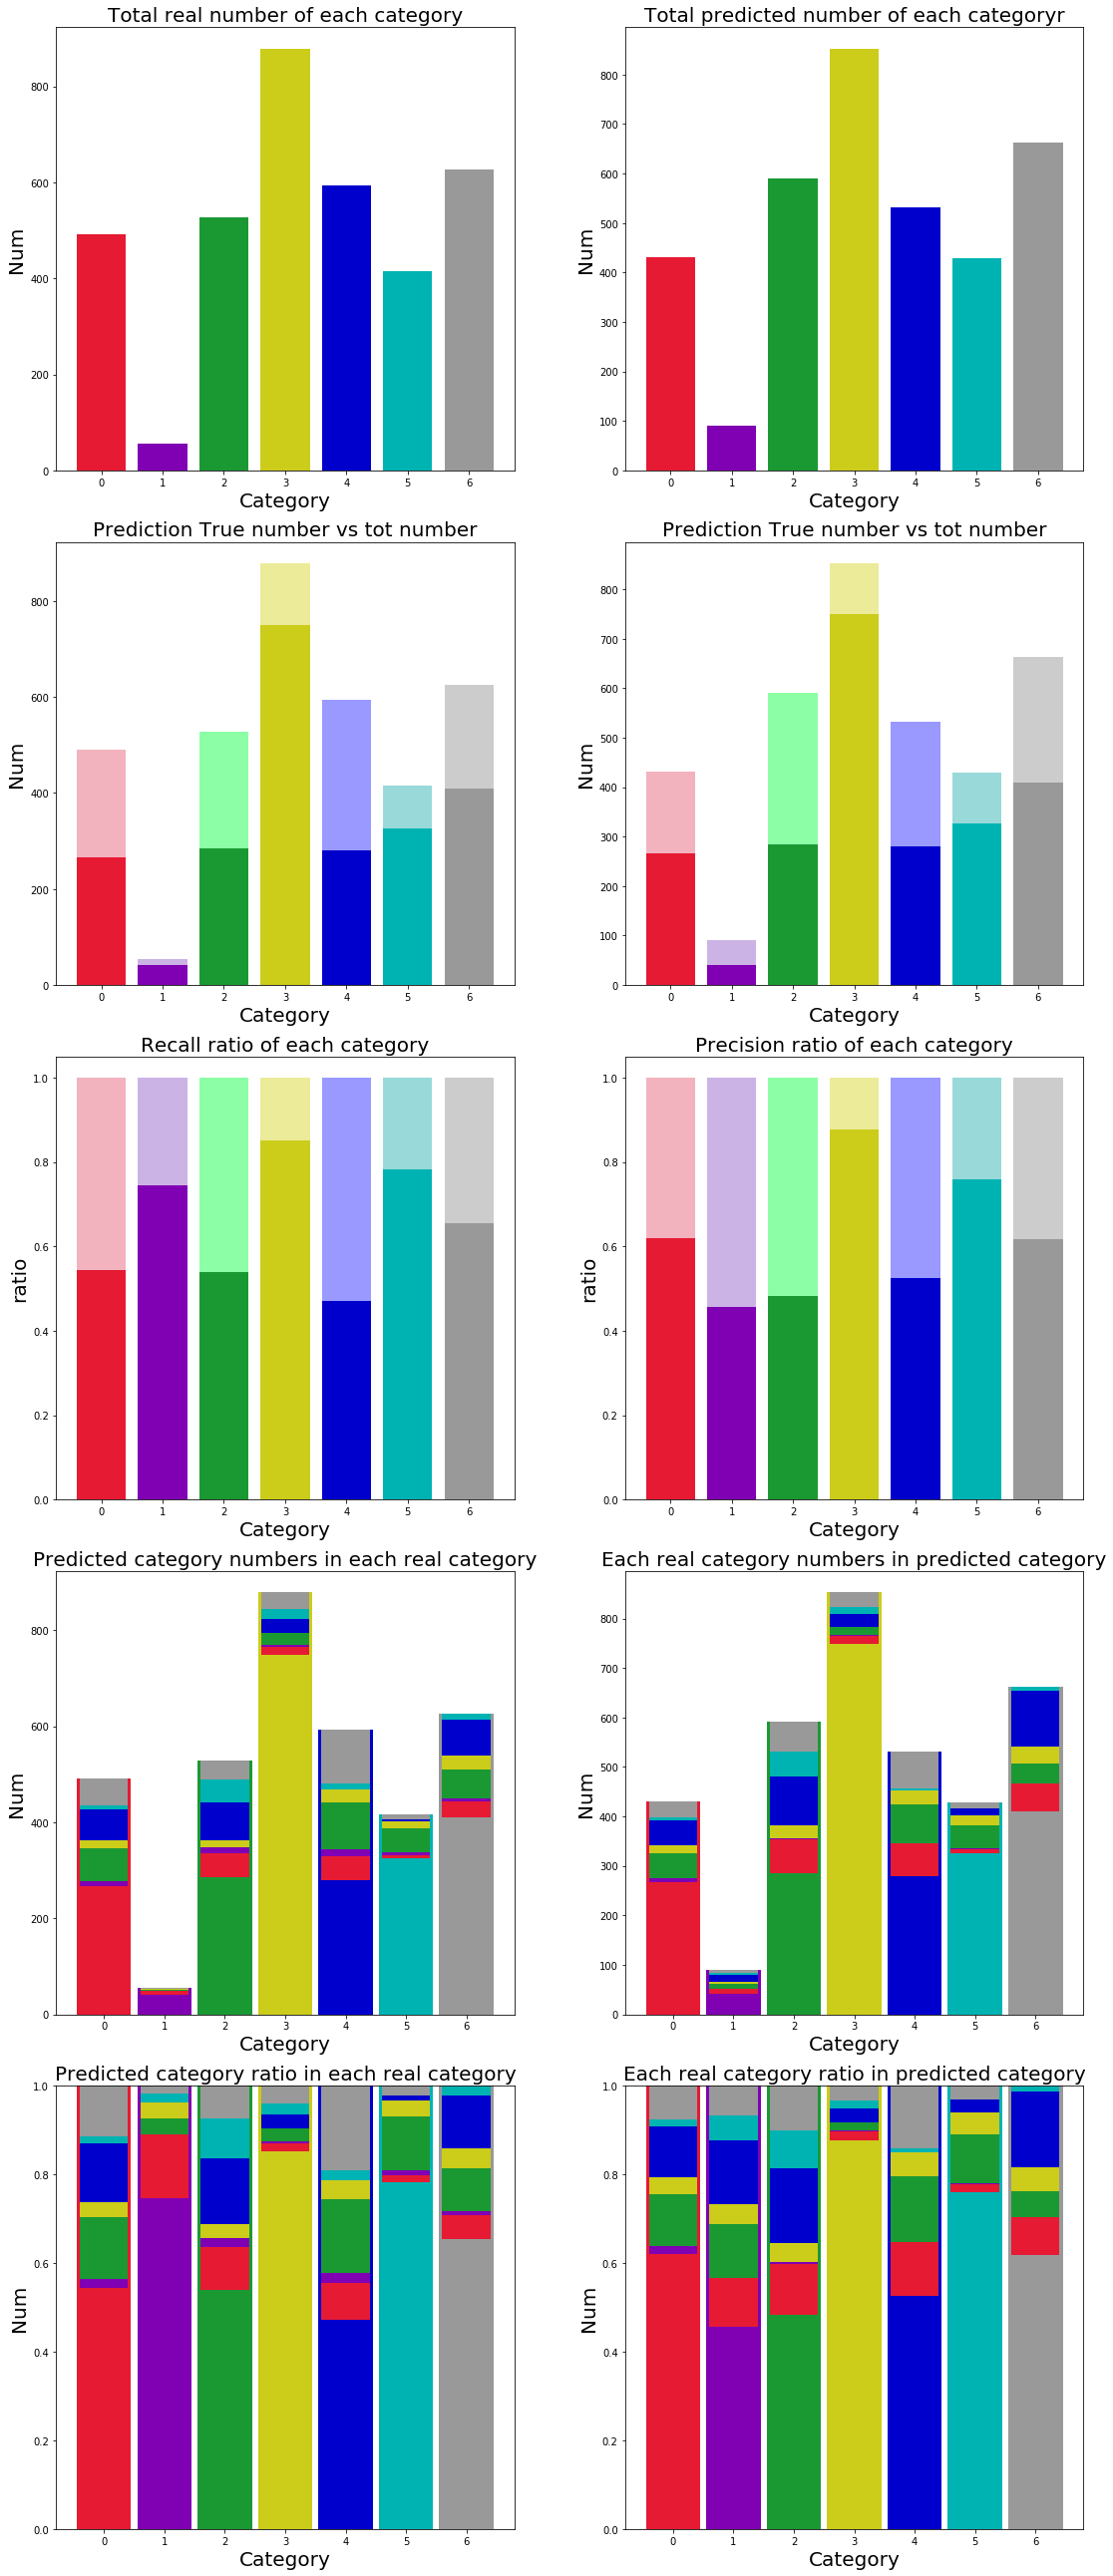

In [102]:
result_show0()